<a href="https://colab.research.google.com/github/Thanveerahmd/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Min edit calculator

In [ ]:
def minDis(s1, s2, n, m, dp) :
           
  # If any string is empty,
  # return the remaining characters of other string          
  if(n == 0) :
      return m        
  if(m == 0) :
      return n
                     
  # To check if the recursive tree
  # for given n & m has already been executed
  if(dp[n][m] != -1)  :
      return dp[n][m];
                    
  # If characters are equal, execute 
  # recursive function for n-1, m-1    
  if(s1[n - 1] == s2[m - 1]) :           
    if(dp[n - 1][m - 1] == -1) : 
        dp[n][m] = minDis(s1, s2, n - 1, m - 1, dp)
        return dp[n][m]                   
    else :
        dp[n][m] = dp[n - 1][m - 1]
        return dp[n][m]
          
  # If characters are nt equal, we need to           
  # find the minimum cost out of all 3 operations.         
  else :            
    if(dp[n - 1][m] != -1) :   
      m1 = dp[n - 1][m]      
    else :
      m1 = minDis(s1, s2, n - 1, m, dp)
               
    if(dp[n][m - 1] != -1) :                
      m2 = dp[n][m - 1]            
    else :
      m2 = minDis(s1, s2, n, m - 1, dp)   
    if(dp[n - 1][m - 1] != -1) :    
      m3 = dp[n - 1][m - 1]    
    else :
      m3 = minDis(s1, s2, n - 1, m - 1, dp)
      
    dp[n][m] = 1 + min(m1, min(m2, m3))
    return dp[n][m]

In [ ]:
str1 = "INCORPORATION" 
str2 = "AIRMATIAL" 
     
n = len(str1)
m = len(str2)
dp = [[-1 for i in range(m + 1)] for j in range(n + 1)]
               
print(minDis(str1, str2, n, m, dp))

9


In [ ]:
def minDistacne(word1, word2):
    # word1 -> laid horizontally
    # word2 -> laid vertically

    dp = [[0 for _ in range(len(word1) + 1)] for _ in range(len(word2) + 1)]

    for row in range(len(word2) + 1):
        for col in range(len(word1) + 1):
            if row == 0:
                dp[row][col] = col
            elif col == 0:
                dp[row][col] = row
            elif word2[row - 1] == word1[col - 1]:
                dp[row][col] = dp[row - 1][col - 1]
            else:
                dp[row][col] = 1 + min(
                    dp[row - 1][col - 1], dp[row - 1][col], dp[row][col - 1]
                )
    return dp[len(word2)][len(word1)]


In [ ]:
str1 = "INCORPORATION" 
str2 = "AIRMATIAL" 
print(minDistacne(str1, str2))

9


# Min edit Table

In [ ]:
import argparse
import logging
import sys

skipNoOps = False

class Insertion:
    cost = 1
    @staticmethod
    def getDependentCellIndices(i,j):
        if i==0 and j==0:
            raise ArithmeticError()
        else:
            return (i,j-1)
    @staticmethod
    def getVerb():
        return 'Insert'

class Deletion:
    cost = 1
    @staticmethod
    def getDependentCellIndices(i,j):
        if i==0 and j==0:
            raise ArithmeticError()
        else:
            return (i-1,j)
    @staticmethod
    def getVerb():
        return 'Delete'

class Substitution:
    cost = 1
    def getDependentCellIndices(i,j):
        if i==0 and j==0:
            raise ArithmeticError()
        else:
            return (i-1,j-1)
    @staticmethod
    def getVerb():
        return 'Substitute'

class NoOp:
    cost = 0
    def getDependentCellIndices(i,j):
        if i==0 and j==0:
            raise ArithmeticError()
        else:
            return (i-1,j-1)

    @staticmethod
    def getVerb():
        return 'NoOp'


class Distance:
    def __init__(self, value=0):
        self.value = value
        self.operations = [ ] # used for backtracing the table

def computeEditDistance(initialString, finalString):
    logging.info("Calculating edit distance '{}' => '{}'".format(initialString, finalString))

    # Create (m+1)x(n+1) table
    table = [ [ Distance(0) for j in range(0, len(finalString) +1)] 
              for i in range(0, len(initialString) +1) 
            ]

    # Initialisation
    for i in range(0, len(initialString) +1):
        table[i][0].value = Deletion.cost * i
        if i != 0:
            table[i][0].operations.append( Deletion )

    # Initialisation
    for j in range(0, len(finalString) +1):
        table[0][j].value = Insertion.cost * j
        if j != 0:
            table[0][j].operations.append( Insertion )

    logging.info('Finished initialising')
    printTable(table, initialString, finalString)

    for i in range(1, len(initialString) +1):
        for j in range(1, len(finalString) +1):
            initalStringIndex = i - 1
            finalStringIndex = j - 1

            # Calculate the cost of each type of operation and pair with the type
            # of operation which will be stored for backtracing later
            costs= [ (table[i][j-1].value + Insertion.cost, Insertion ),
                     (table[i-1][j].value + Deletion.cost, Deletion ),
                     (table[i-1][j-1].value + Substitution.cost, Substitution)
                   ]

            if initialString[initalStringIndex] == finalString[finalStringIndex]:
                costs.append( (table[i-1][j-1].value, NoOp) )

            # Do in-place sort, sorting by the cost of the operation
            costs.sort(key= lambda pair: pair[0])

            # Record the minimum cost
            table[i][j].value = costs[0][0]

            # Record the operation(s) that give the minimum cost for
            # backtracing purposes
            minimumCost = costs[0][0]
            for (costValue, costType) in costs:
                if costValue > minimumCost:
                    break

                table[i][j].operations.append( costType )

    logging.info('Calculation complete')
    printTable(table, initialString, finalString)
    return table

def printTable(table, initialString, finalString):
    m = len(table)
    n = len(table[0])
    print(" ")
    print(" ")
    row_format = "{:^5}" * ( len(finalString) +2 )
    header = list("  ")
    header.extend(finalString)
    print(row_format.format(*header))

    for rowNum in range(0, len(initialString) + 1 ):
        row = [ ]
        if rowNum == 0:
            row.append(' ')
        else:
            row.append( initialString[ rowNum -1 ])

        row += [ ed.value for ed in table[rowNum] ]
        print(row_format.format(*row))

def computeOperations(table, initialString, finalString, recordNoOps):
    from collections import namedtuple
    import copy
    Operation = namedtuple('Operation', ['point','op'])
    # list of list of Operation tuples
    incomplete_solutions = [ ]
    complete_solutions = [ ]

    i = len(initialString)
    j = len(finalString)
    d = table[i][j]


    # Push on the initial solutions
    for op in d.operations:
        incomplete_solutions.append( [ Operation(point=(i,j), op=op) ] )
        logging.info('Added initial solution')

    while len(incomplete_solutions) > 0:
        solution = incomplete_solutions.pop()
        current = solution[-1]
        i = current.point[0]
        j = current.point[1]

        logging.info('Staring solution at {},{}'.format(i,j))


        # Compute remainder of solution
        while not (i == 0 and j == 0):
            new_location = current.op.getDependentCellIndices(i,j)
            i = new_location[0]
            j = new_location[1]
            
            nextCell = table[i][j]

            # Loop over operations, if there is more than one operation
            # we need to generate a new solution starting from this point
            numberOfOperationsAdded=0
            for op in nextCell.operations:
                newOperation = Operation(point=(i,j), op=op)

                if op == NoOp and not recordNoOps:
                    logging.info('Skipping NoOp at ({},{})'.format(i,j))
                    current = newOperation
                    continue

                if numberOfOperationsAdded == 0:
                    logging.info('Adding new operation at ({i},{j})'.format(i=i,j=j))
                    current = newOperation
                    solution.append(newOperation)
                else:
                    # There is more than one path we can take so we need
                    # to make more solutions and follow them later
                    logging.info('Forking new operation at ({i},{j})'.format(i=i,j=j))
                    newSolution = copy.deepcopy( solution )
                    newSolution.append(newOperation)
                    incomplete_solutions.append( newSolution )

                numberOfOperationsAdded += 1



        # The current solution is now complete

        # Reverse the order of operations so we present in correct order
        solution.reverse()
        complete_solutions.append(solution)
    
    logging.info('Computed {} solution(s)'.format(len(complete_solutions)))
    return complete_solutions

def printSolution(solution, initialString, finalString):
    for op in solution:
        msg = op.op.getVerb() + " "
        if op.op == Insertion:
            msg += "'{}'".format(finalString[ op.point[1] -1])
        elif op.op == Deletion:
            msg += "'{}'".format(initialString[ op.point[0] -1])
        elif op.op == Substitution:
            msg += "'{}' for '{}'".format(initialString[ op.point[0] -1],
                                          finalString[ op.point[1] -1])
        elif op.op == NoOp:
            msg += "'{}' = '{}'".format(initialString[ op.point[0] -1],
                                          finalString[ op.point[1] -1])

        else:
            raise Exception('Unsupported op')

        print(msg)

    print("")


In [ ]:
initialString = "INCORPORATION"
finalString = "AIRMATIAL"
ed = computeEditDistance(initialString,finalString )
minimumEditDistance = ed[len(initialString)][len(finalString)].value
logging.info("Minimum edit distance is {}".format(minimumEditDistance))
solutions = computeOperations(ed, initialString, finalString, False)
print("")
for (index,s) in enumerate(solutions):
  logging.info("Solution: {}".format(index))
  printSolution(s, initialString, finalString)

 
            A    I    R    M    A    T    I    A    L  
       0    1    2    3    4    5    6    7    8    9  
  I    1    0    0    0    0    0    0    0    0    0  
  N    2    0    0    0    0    0    0    0    0    0  
  C    3    0    0    0    0    0    0    0    0    0  
  O    4    0    0    0    0    0    0    0    0    0  
  R    5    0    0    0    0    0    0    0    0    0  
  P    6    0    0    0    0    0    0    0    0    0  
  O    7    0    0    0    0    0    0    0    0    0  
  R    8    0    0    0    0    0    0    0    0    0  
  A    9    0    0    0    0    0    0    0    0    0  
  T   10    0    0    0    0    0    0    0    0    0  
  I   11    0    0    0    0    0    0    0    0    0  
  O   12    0    0    0    0    0    0    0    0    0  
  N   13    0    0    0    0    0    0    0    0    0  
 
            A    I    R    M    A    T    I    A    L  
       0    1    2    3    4    5    6    7    8    9  
  I    1    1    1    2    3    4    5    6 

# CYK-Parser

In [ ]:
class Dictlist(dict):
    
    def __setitem__(self, key, value):
        try:
            self[key]
        except KeyError:
            super(Dictlist, self).__setitem__(key, [])
        self[key].append(value)


class production_rule(object):
    
    result = None
    p1 = None
    p2 = None
    
    #Parameters:
    #   Result: String
    #   p1: Production rule (left child of the production rule)
    #   p2: Production rule (right child of the production rule)
    def __init__(self,result,p1,p2):
        self.result = result
        self.p1 = p1
        self.p2 = p2
    
    #Returns the result of the production rule, VP, S, NP... 
    @property
    def get_type(self):
        return self.result
    
    #Returns the left child of the production rule
    @property
    def get_left(self):
        return self.p1
    
    #Returns the right child of the production rule
    @property
    def get_right(self):
        return self.p2

class Cell(object):
    productions = []
    
    
    #Parameters:
    #   Productions: List of production rules
    
    def __init__(self, productions=None):
        if productions is None:
            self.productions = []
        else:
            self.productions = productions
            
    def add_production(self, result,p1,p2):
        self.productions.append(production_rule(result,p1,p2))
    
    def set_productions(self, p):
        self.productions = p
    
    @property
    def get_types(self):
        types = []
        for p in self.productions:
            types.append(p.result)
        return types
    @property
    def get_rules(self):       
        return self.productions


class Grammar(object):
    
    grammar_rules = Dictlist()
    parse_table = None
    length = 0
    tokens = []
    number_of_trees = 0
    
    #Parameters:
    #   Filename: file containing a grammar
    
    def __init__(self, filename):
        self.grammar_rules = Dictlist()
        self.parse_table = None
        self.length = 0
        for line in open(filename):
            a, b = line.split("->")
            self.grammar_rules[b.rstrip().strip()]=a.rstrip().strip()
        
        if len(self.grammar_rules) == 0:
            raise ValueError("No rules found in the grammar file")
        print('')
        print('Grammar file readed succesfully. Rules readed:')
        self.print_rules()
        print('')
    
    #Print the production rules in the grammar
    
    def print_rules(self):
        for r in self.grammar_rules:
            for p in self.grammar_rules[r]:
                print(str(p) + ' --> ' + str(r))
        
    def apply_rules(self,t):
        try:
            return self.grammar_rules[t]
        except KeyError as r:
            return None
            
    #Parse a sentence (string) with the CYK algorithm   
    def parse(self,sentence):
        self.number_of_trees = 0
        self.tokens = sentence.split()
        self.length = len(self.tokens)
        if self.length < 1:
            raise ValueError("The sentence could no be read")
        self.parse_table = [ [Cell() for x in range(self.length - y)] for y in range(self.length) ]
        
         #Process the first line
        
        for x, t in enumerate(self.tokens):
            
            r = self.apply_rules(t)
            if r == None:
                raise ValueError("The word " + str(t) + " is not in the grammar")
            else:
                for w in r: 
                    self.parse_table[0][x].add_production(w,production_rule(t,None,None),None)
        
        
        #Run CYK-Parser
        
        
        for l in range(2,self.length+1):
            for s in range(1,self.length-l+2):
                for p in range(1,l-1+1):
                    
                    t1 = self.parse_table[p-1][s-1].get_rules
                    t2 = self.parse_table[l-p-1][s+p-1].get_rules
                            
                    for a in t1:
                        for b in t2:
                            r = self.apply_rules(str(a.get_type) + " " + str(b.get_type))
                                    
                            if r is not None:
                                for w in r:
                                    print('Applied Rule: ' + str(w) + '[' + str(l) + ',' + str(s) + ']' + ' --> ' + str(a.get_type) + '[' + str(p) + ',' + str(s) + ']' + ' ' + str(b.get_type)+ '[' + str(l-p) + ',' + str(s+p) + ']')
                                    self.parse_table[l-1][s-1].add_production(w,a,b)
                               
        self.number_of_trees = len(self.parse_table[self.length-1][0].get_types)
        if  self.number_of_trees > 0:
            print("----------------------------------------")
            print('The sentence IS accepted in the language')
            print('Number of possible trees: ' + str(self.number_of_trees))
            print("----------------------------------------")
        else:
            print("--------------------------------------------")
            print('The sentence IS NOT accepted in the language')
            print("--------------------------------------------")
        
        
    #Returns a list containing the parent of the possible trees that we can generate for the last sentence that have been parsed
    def get_trees(self):
        return self.parse_table[self.length-1][0].productions
                
                
    #@TODO
    def print_trees(self):
        pass
                      
    #Print the CYK parse trable for the last sentence that have been parsed.             
    def print_parse_table(self):
        try:
            from tabulate import tabulate
        except (ModuleNotFoundError,ImportError) as r:
            import subprocess
            import sys
            import logging
            logging.warning('To print the CYK parser table the Tabulate module is necessary, trying to install it...')
            subprocess.call([sys.executable, "-m", "pip", "install", 'tabulate'])

            try:
                from tabulate import tabulate
                logging.warning('The tabulate module has been instaled succesfuly!')

            except (ModuleNotFoundError,ImportError) as r:
                logging.warning('Unable to install the tabulate module, please run the command \'pip install tabulate\' in a command line')

        
        lines = [] 
        
        
        
        for row in reversed(self.parse_table):
            l = []
            for cell in row:
                l.append(cell.get_types)
            lines.append(l)
        
        lines.append(self.tokens)
        print('')
        print(tabulate(lines))
        print('')

In [ ]:
g = Grammar('example_grammar1.txt')
g.parse('astronomers saw stars with ears')
g.print_parse_table()
trees = g.get_trees()
p = trees[0].get_type
l = trees[0].get_left
d = trees[0].get_right
p = trees[1].get_type
l = trees[1].get_left
d = trees[1].get_right


Grammar file readed succesfully. Rules readed:
S --> NP VP
PP --> P NP
VP --> V NP
VP --> VP PP
NP --> NP PP
NP --> astronomers
NP --> ears
NP --> saw
V --> saw
NP --> telescope
NP --> stars
P --> with

Applied Rule: VP[2,2] --> V[1,2] NP[1,3]
Applied Rule: PP[2,4] --> P[1,4] NP[1,5]
Applied Rule: S[3,1] --> NP[1,1] VP[2,2]
Applied Rule: NP[3,3] --> NP[1,3] PP[2,4]
Applied Rule: VP[4,2] --> V[1,2] NP[3,3]
Applied Rule: VP[4,2] --> VP[2,2] PP[2,4]
Applied Rule: S[5,1] --> NP[1,1] VP[4,2]
Applied Rule: S[5,1] --> NP[1,1] VP[4,2]
----------------------------------------
The sentence IS accepted in the language
Number of possible trees: 2
----------------------------------------

-----------  ------------  ------  ------  ------
['S', 'S']
[]           ['VP', 'VP']
['S']        []            ['NP']
[]           ['VP']        []      ['PP']
['NP']       ['NP', 'V']   ['NP']  ['P']   ['NP']
astronomers  saw           stars   with    ears
-----------  ------------  ------  ------  ------



In [ ]:
g = Grammar('example_grammar2.txt')
g.parse('eats she fork a fish')
g.print_parse_table()
g.get_trees()


Grammar file readed succesfully. Rules readed:
S --> NP VP
VP --> VP PP
VP --> V NP
VP --> eats
V --> eats
PP --> P NP
NP --> Det N
NP --> she
P --> with
N --> fish
N --> fork
Det --> a

Applied Rule: VP[2,1] --> V[1,1] NP[1,2]
Applied Rule: NP[2,4] --> Det[1,4] N[1,5]
--------------------------------------------
The sentence IS NOT accepted in the language
--------------------------------------------

-----------  ------  -----  -------  -----
[]
[]           []
[]           []      []
['VP']       []      []     ['NP']
['VP', 'V']  ['NP']  ['N']  ['Det']  ['N']
eats         she     fork   a        fish
-----------  ------  -----  -------  -----



[]

In [ ]:
g = Grammar('example_grammar1.txt')
g.parse('the pudding Kim believes Sandy likes stinks')
g.print_parse_table()
g.get_trees()


Grammar file readed succesfully. Rules readed:
S --> NP VP
NP --> DET NP
NP --> N NP
NP --> NNS NNS
VP --> VBZ
VP --> VP NP
NP --> Kim
N --> pudding
DET --> the
VBZ --> likes
NNS --> likes
N --> Sandy
VBZ --> stinks
NNS --> stinks
VBZ --> believes

Applied Rule: NP[2,2] --> N[1,2] NP[1,3]
Applied Rule: NP[2,6] --> NNS[1,6] NNS[1,7]
Applied Rule: NP[3,1] --> DET[1,1] NP[2,2]
Applied Rule: NP[3,5] --> N[1,5] NP[2,6]
--------------------------------------------
The sentence IS NOT accepted in the language
--------------------------------------------

-------  -------  ------  --------  ------  --------------  --------------
[]
[]       []
[]       []       []
[]       []       []      []
['NP']   []       []      []        ['NP']
[]       ['NP']   []      []        []      ['NP']
['DET']  ['N']    ['NP']  ['VBZ']   ['N']   ['VBZ', 'NNS']  ['VBZ', 'NNS']
the      pudding  Kim     believes  Sandy   likes           stinks
-------  -------  ------  --------  ------  --------------  ---------

[]

# Nlp Ngram counts

In [ ]:
!pip install --user nltk

In [ ]:
import nltk
import pandas as pd
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize

In [ ]:
test_list = ['s1 cara met the robot at the airport s2',
             's1 she was with her parents s2',
             's1 now they were flying back home to london s2',
             's1 i can hear you s2',
             's1 planes moving cargo being loaded everyone was so busy s2'
             ]

In [ ]:
s_new = ["s1 planes were flying to london s2"]

In [ ]:
def generate_unigram(list_of_comments):
    unigram_list = []
    for comment in list_of_comments:
      tokens = re.split('\W+', comment)
      unigram_list = unigram_list + list(tokens)
    
    return unigram_list

def generate_bigram(list_of_comments):
    bigram_list = []
    for comment in list_of_comments:
      tokens = re.split('\W+', comment)
      bigrams = nltk.bigrams(tokens)
      bigram_list = bigram_list + list(bigrams)
    
    return bigram_list

def calculate_probablity(test_comment, bigram_freq, unigram_freq):
    prob = 1.0
    chain_prob = []
    for token in range(len(test_comment)):
        if test_comment[token] in bigram_freq:
            bigram_count = bigram_freq[test_comment[token]]
        else:
            bigram_count = 0

        if test_comment[token][0] in unigram_freq:
            unigram_count = unigram_freq[test_comment[token][0]]
        else:
            unigram_count = 0
        
        prob = prob * ((bigram_count + 1) / (unigram_count + len(unigram_freq)))
        print(str('p(')+str(test_comment[token][1])+str('|')+str(test_comment[token][0])+str(') = ')+" "+str((bigram_count + 1))+str('/')+str((unigram_count + len(unigram_freq))))
        chain_prob.append((bigram_count + 1) / (unigram_count + len(unigram_freq)))

    return prob,chain_prob

def perplexity_cal(probability, n):
    return pow(probability, (-1 / n))


In [ ]:
unigrams = generate_unigram(test_list)
bigrams = generate_bigram(test_list)
bigram_freq = FreqDist(bigrams)
unigram_freq = FreqDist(unigrams)

print("----------bigram table------------")
for k,v in bigram_freq.items():
    print(k,v)

print("bigram count "+str(len(bigram_freq)))
print("")

print("----------unigram table------------")
for k,v in unigram_freq.items():
    print(k,v)


print("unigram count "+str(len(unigram_freq)))
print("")

print("----------bigram of new sentence------------")

bigrams_s_new = generate_bigram(s_new)
bigram_freq_s_new = FreqDist(bigrams_s_new)
for k,v in bigram_freq_s_new.items():
    print(k,v)


print("bigram_freq_s_new count "+str(len(bigram_freq_s_new)))
print("")

print("----------unigram of new sentence------------")

unigram_s_new = generate_unigram(s_new)
unigram_freq_s_new = FreqDist(unigram_s_new)
for k,v in unigram_freq_s_new.items():
    print(k,v)

print("unigram_s_new count "+str(len(unigram_freq_s_new)))
print("")


----------bigram table------------
('s1', 'cara') 1
('cara', 'met') 1
('met', 'the') 1
('the', 'robot') 1
('robot', 'at') 1
('at', 'the') 1
('the', 'airport') 1
('airport', 's2') 1
('s1', 'she') 1
('she', 'was') 1
('was', 'with') 1
('with', 'her') 1
('her', 'parents') 1
('parents', 's2') 1
('s1', 'now') 1
('now', 'they') 1
('they', 'were') 1
('were', 'flying') 1
('flying', 'back') 1
('back', 'home') 1
('home', 'to') 1
('to', 'london') 1
('london', 's2') 1
('s1', 'i') 1
('i', 'can') 1
('can', 'hear') 1
('hear', 'you') 1
('you', 's2') 1
('s1', 'planes') 1
('planes', 'moving') 1
('moving', 'cargo') 1
('cargo', 'being') 1
('being', 'loaded') 1
('loaded', 'everyone') 1
('everyone', 'was') 1
('was', 'so') 1
('so', 'busy') 1
('busy', 's2') 1
bigram count 38

----------unigram table------------
s1 5
cara 1
met 1
the 2
robot 1
at 1
airport 1
s2 5
she 1
was 2
with 1
her 1
parents 1
now 1
they 1
were 1
flying 1
back 1
home 1
to 1
london 1
i 1
can 1
hear 1
you 1
planes 1
moving 1
cargo 1
being 1
l

In [ ]:
p , chain_p = calculate_probablity(bigrams_s_new, bigram_freq, unigram_freq)
print(p)
print(chain_p)
print((len(generate_unigram(s_new))-1))
perplexity = perplexity_cal(p,(len(generate_unigram(s_new))-1))
print("perplexity of model "+str(perplexity))

p(planes|s1) =  2/38
p(were|planes) =  1/34
p(flying|were) =  2/34
p(to|flying) =  1/34
p(london|to) =  2/34
p(s2|london) =  2/34
9.267056285838718e-09
[0.05263157894736842, 0.029411764705882353, 0.058823529411764705, 0.029411764705882353, 0.058823529411764705, 0.058823529411764705]
6
perplexity of model 21.81941151576386


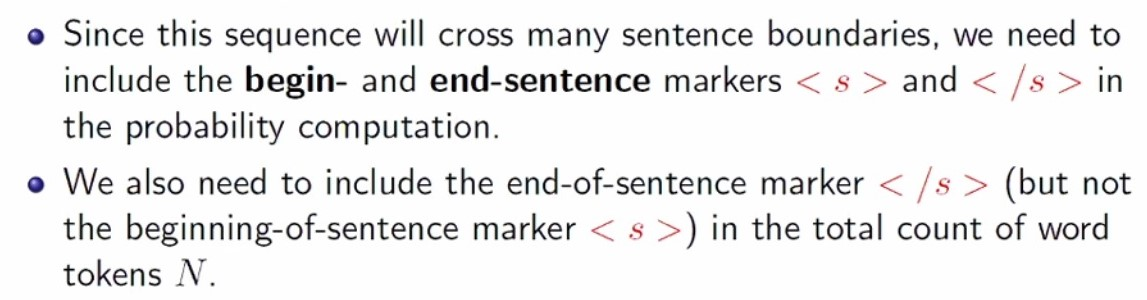